In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ami_df = pd.read_csv('./auc_result_EUCASTv11_AMI.csv')
ami_df['drug'] = 'ami'
azt_df = pd.read_csv('./auc_result_EUCASTv11_AZT.csv')
azt_df['drug'] = 'azt'
cip_df = pd.read_csv('./auc_result_EUCASTv11_CIP.csv')
cip_df['drug'] = 'cip'
col_df = pd.read_csv('./auc_result_EUCASTv11_COL.csv')
col_df['drug'] = 'col'
cza_df = pd.read_csv('./auc_result_EUCASTv11_CZA.csv')
cza_df['drug'] = 'cza'
imi_df = pd.read_csv('./auc_result_EUCASTv11_IMI.csv')
imi_df['drug'] = 'imi'
mer_df = pd.read_csv('./auc_result_EUCASTv11_MER.csv')
mer_df['drug'] = 'mer'
ptz_df = pd.read_csv('./auc_result_EUCASTv11_PTZ.csv')
ptz_df['drug'] = 'ptz'
taz_df = pd.read_csv('./auc_result_EUCASTv11_TAZ.csv')
taz_df['drug'] = 'taz'
tic_df = pd.read_csv('./auc_result_EUCASTv11_TIC.csv')
tic_df['drug'] = 'tic'
tob_df = pd.read_csv('./auc_result_EUCASTv11_TOB.csv')
tob_df['drug'] = 'tob'
toltz_df = pd.read_csv('./auc_result_EUCASTv11_TOLTZ.csv')
toltz_df['drug'] = 'toltz'

combined_df = pd.concat([ami_df, azt_df, cip_df, col_df, cza_df, imi_df, mer_df, ptz_df, taz_df, tic_df, tob_df, toltz_df], axis=0)


combined_df



,y_true,WDNN,fWDNN,RF,LR,SVM,lightGBM,drug
0,0.0,0.004871,0.020349,0.100,0.023270,0.204253,0.014377,ami
1,0.0,0.000561,0.004525,0.035,0.003938,0.095321,0.009365,ami
2,0.0,0.091534,0.749193,0.330,0.297916,0.368045,0.002485,ami
3,0.0,0.356212,0.998244,0.540,0.058908,0.183324,0.121680,ami
4,0.0,0.003786,0.002087,0.000,0.115363,0.289448,0.005610,ami
...,...,...,...,...,...,...,...,...
84,0.0,0.012259,0.045248,0.130,0.034206,0.063193,0.010444,toltz
85,0.0,0.747079,0.995038,0.380,0.363077,0.322076,0.005450,toltz
86,1.0,0.697984,1.000000,0.690,0.900650,0.506933,0.931826,toltz
87,0.0,0.029834,0.137099,0.150,0.027399,0.139703,0.043407,toltz


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss


drugs = list(combined_df['drug'].unique())
models = ['WDNN', 'fWDNN', 'RF', 'LR', 'SVM', 'lightGBM']


# tob_df = combined_df[combined_df['drug'] == 'tob']

# accuracy_score(tob_df['y_true'], tob_df['WDNN'].round())



for drug in drugs:
    performance_results = {}
    performance_results['metric'] = ['accuracy', 'auc', 'log_loss']

    tmp_df = combined_df[combined_df['drug'] == drug]

    for model in models:
        tmp_performances = []
        tmp_acc = accuracy_score(tmp_df['y_true'], (tmp_df[model] > 0.5))
        tmp_performances.append(tmp_acc)
        
        tmp_auc = roc_auc_score(tmp_df['y_true'], tmp_df[model])
        tmp_performances.append(tmp_auc)

        tmp_log_loss = log_loss(tmp_df['y_true'], tmp_df[model])
        tmp_performances.append(tmp_log_loss)
    
        performance_results[model] = tmp_performances

    performance_df = pd.DataFrame(performance_results)
    performance_df.to_csv(f"performance_{drug}.csv", index=False)


In [14]:
drugs

['ami',
 'azt',
 'cip',
 'col',
 'cza',
 'imi',
 'mer',
 'ptz',
 'taz',
 'tic',
 'tob',
 'toltz']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

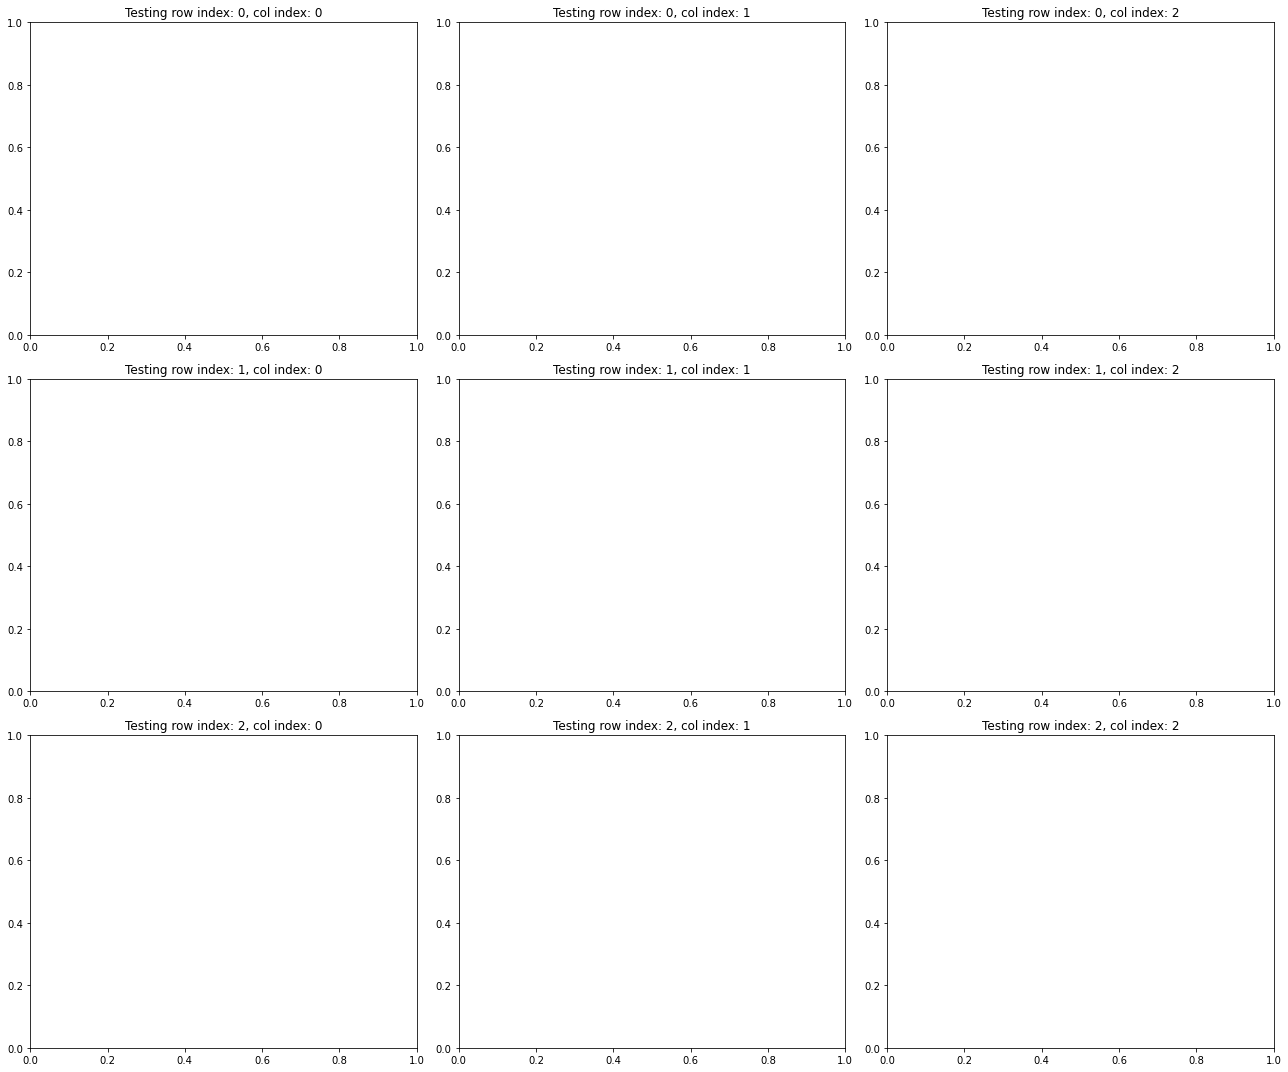

In [15]:
fig = plt.figure(figsize=(18,15))
fig.subplots_adjust(left=0.2, wspace=0.6)

for row_index in range(3):
    for col_index in range(3):
        tmp_ax = plt.subplot2grid((3,3), (row_index, col_index))
        tmp_ax.set_title(f"Testing row index: {row_index}, col index: {col_index}")

plt.tight_layout()

plt.show()

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    random_state=1234)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [21]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.01818181818181818, 0.0181818...","[0.0, 0.011363636363636364, 0.7840909090909091...",0.984091
GaussianNB,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.32954545454545453, 0.3522727272727273,...",0.982851
KNeighborsClassifier,"[0.0, 0.05454545454545454, 0.07272727272727272...","[0.0, 0.8409090909090909, 0.9318181818181818, ...",0.957438
DecisionTreeClassifier,"[0.0, 0.07272727272727272, 1.0]","[0.0, 0.9431818181818182, 1.0]",0.935227
RandomForestClassifier,"[0.0, 0.0, 0.01818181818181818, 0.018181818181...","[0.0, 0.4659090909090909, 0.6590909090909091, ...",0.983368
